## Evaluate Progress of Labellers

Use this notebook to evaluate the progress of labellers and to inspect their labels against imagery. 

## Set-up 

In [1]:
import os
import sys
import pandas as pd
module_path = os.path.abspath(os.path.join('src'))
sys.path.insert(0, module_path)

from labelreview import labelReview

## Get assignment data

In [2]:
lr = labelReview(config="config-db.yaml")
query = \
    "SELECT name,hit_id,assignment_id,worker_id,email,score,status,kml_type "\
    "FROM assignment_data "\
    "LEFT JOIN hit_data USING (hit_id) "\
    "LEFT JOIN kml_data USING (name) "\
    "LEFT JOIN users ON assignment_data.worker_id = users.id"
assignments = lr.get_data(query)

### Summarize assignment counts and score

In [3]:
counts = assignments[["worker_id", "email", "kml_type"]]\
    .groupby(["worker_id", "email", "kml_type"], as_index=False)\
    .value_counts()

scores = assignments[["worker_id", "score"]]\
    .groupby("worker_id", as_index=False)\
    .mean("score")

Assignment counts

In [4]:
counts.pivot_table(values="count", index=["worker_id", "email"], 
                   columns="kml_type")

,kml_type,F,Q
worker_id,email,,
10,stanitebros@gmail.com,497,63
11,pacyedward@gmail.com,517,60
12,kofidadon82@gmail.com,519,45
13,euniceamponsem@gmail.com,637,68
14,segbefiadela@gmail.com,349,33
16,nyarkodelaiah4@gmail.com,511,64
18,licia.abina@yahoo.com,462,41
19,ghxeflide@st.ug.edu.gh,532,57
20,kof1nti@outlook.com,471,69


Assignment counts plotted

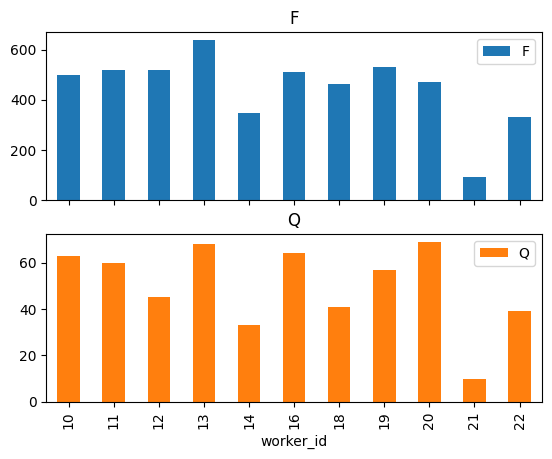

In [5]:
counts.pivot_table(values="count", index="worker_id", columns="kml_type")\
    .plot(subplots=True, kind="bar")
None

Mean score against Q sites for each labeller

In [6]:
scores

,worker_id,score
0,10,0.589393
1,11,0.595190
2,12,0.559397
3,13,0.564997
4,14,0.651450
5,16,0.502437
6,18,0.598505
7,19,0.573337
8,20,0.545579
9,21,0.667021


Distribution of scores for each labeller, as box plots

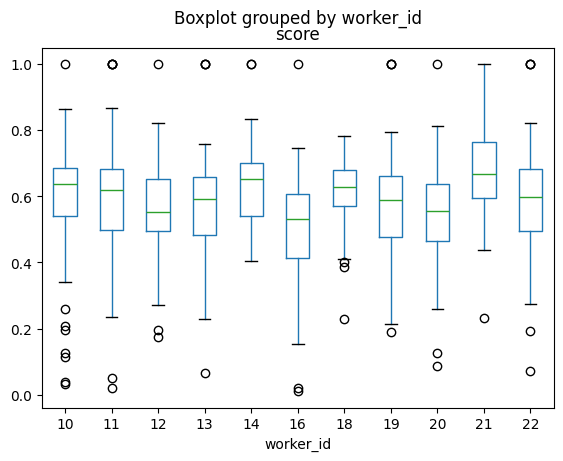

In [7]:
# assignments.query("worker_id==13 & kml_type=='Q'")["score"]
assignments.query("kml_type=='Q'")[["worker_id", "score"]]\
    .boxplot(by='worker_id', column='score', grid=False)
None

Add custom queries of the retrieved data as needed, e.g. 

- Q scores for labeller (worker) 20

    ```python
    assignments.query("worker_id==20 & kml_type=='Q'")["score"]
    ```

- The first 10 F scores

    ```python
    assignments.query("kml_type=='F'").iloc[0:10]
    ```

## Review labels against imagery

Select and evaluate specific labeller's work at selected sites. 

Labels can be selected using the `get_labels` method as follows:

- By type of task, F or Q. If you select "Q" the labeller's maps will be shown against the expert maps for the same site.
- Through random choice, or for a particular site name.

For example, the following call will get one randomly selected Q type site for labeller 10. 

```python
labels = lr.get_labels(assignments, id=10, type="Q")
```

This one will get a specifically named Q type site completed by labeller 13  

```python
labels = lr.get_labels(assignments, id=13, type="Q", name="ET0472958")
```


In [3]:
id = 14
labels = lr.get_labels(assignments, id=int(id), type="F")

### Show map

In [4]:
lr.plot_labels(labels)

Loading from SHUB
https://lacunalabeller.crowdmapper.org/api/getkml?kmlName=ET0403129&workerId=14


Map(center=[12.4975, 37.7965], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

### Record review

In [ ]:
lr.record_review(sample=labels["point"]["name"].loc[0], id=labels["id"],
                 expert_labels=True if labels["type"] == "Q" else False)